In [1]:
 #Choose your target. Which column in your tabular dataset will you predict
'''
YEARS: from 2012 to 2017 
Target='Arrest'

'''

"\nYEARS: from 2012 to 2017 \nTarget='Arrest'\n\n"

In [2]:
#Choose which observations you will use to train, validate, and test your model. 
#And which observations, if any, to exclude.

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('Chicago_Crimes_2012_to_2017.csv',low_memory=False)

In [5]:
print(df.shape)
df.head()

(1456714, 23)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [6]:
df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [7]:
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Arrest,1456714,2,False,1079242
Domestic,1456714,2,False,1236660
FBI Code,1456714,26,06,329460
Primary Type,1456714,33,THEFT,329460
Location Description,1455056,142,STREET,330471
Description,1456714,342,SIMPLE,150600
IUCR,1456714,365,0820,136036
Updated On,1456714,959,02/04/2016 06:33:39 AM,908366
Block,1456714,32774,001XX N STATE ST,3634
Location,1419631,368286,"(41.883500187, -87.627876698)",2096


In [8]:
df.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [9]:
df.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [10]:
df[df['Case Number']=='Case Number'] #Check if there are other rows unuseful 

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [11]:
df=df.drop('Unnamed: 0',axis=1) #Drop column Unnamed
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [12]:
#Possible target columns 
#Count Unique Values
df['Arrest'].value_counts()

False    1079242
True      377472
Name: Arrest, dtype: int64

In [13]:
df['Primary Type'].value_counts()

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [14]:
df['Date']= pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p' , errors='coerce')

In [15]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [16]:
df.shape

(1456714, 22)

In [17]:
df=df.drop_duplicates()

In [18]:
print(df.shape)
df.head()

(1456714, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,2016-05-03 11:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,2016-05-03 09:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,2016-05-03 11:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,2016-05-03 10:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,2016-05-03 10:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [19]:
target = 'Arrest'
features = df.columns.drop(target)

X = df[features]
y = df[target]

X.shape,y.shape

((1456714, 21), (1456714,))

In [20]:
# Do train/validate/test 3-way split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, train_size=0.80, test_size=0.20, random_state=42)
X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape

((1165371, 21), (291343, 21), (1165371,), (291343,))

In [21]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (932296, 21)
y_train shape (932296,)
X_val shape (233075, 21)
y_val shape (233075,)
X_test shape (291343, 21)
y_test shape (291343,)


In [22]:
def wrangle(X):
    X=X.copy()
    #Engineer date-based features
#     X['Date'] = pd.to_datetime(X['Date'], infer_datetime_format=True)
    X['Month'] = X['Date'].dt.month
    X['Day'] = X['Date'].dt.day
    X['Weekday'] = X['Date'].dt.weekday_name
    X['Ward']= X['Ward'].astype(str)
    X['District']= X['District'].astype(str)

#     #Drop column Date
    X=X.drop(columns=['Date','Updated On','ID'])
    
    return X

In [23]:
X_train=wrangle(X_train)
X_val=wrangle(X_val)
X_test=wrangle(X_test)

In [24]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (932296, 21)
y_train shape (932296,)
X_val shape (233075, 21)
y_val shape (233075,)
X_test shape (291343, 21)
y_test shape (291343,)


In [29]:
932296+233075+291343

1456714

In [25]:
X_train.head()

,Case Number,Block,IUCR,Primary Type,Description,Location Description,Domestic,Beat,District,Ward,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Weekday
34631,HY112920,058XX N WASHTENAW AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,False,2011,20.0,40.0,...,18,1157281.0,1938767.0,2015,41.987745,-87.696875,"(41.98774463, -87.696875213)",1,12,Monday
310043,HV469604,002XX E 115TH ST,0870,THEFT,POCKET-PICKING,OTHER,False,531,5.0,9.0,...,06,1179714.0,1828756.0,2012,41.685379,-87.617737,"(41.685379492, -87.617736935)",9,10,Monday
95232,HV131429,012XX W 50TH ST,2220,LIQUOR LAW VIOLATION,ILLEGAL POSSESSION BY MINOR,RESIDENCE PORCH/HALLWAY,False,933,9.0,16.0,...,22,1168715.0,1871621.0,2012,41.803251,-87.656768,"(41.803250691, -87.656767882)",1,25,Wednesday
183090,HV271642,049XX W ADAMS ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,True,1533,15.0,28.0,...,02,1143599.0,1898880.0,2012,41.878559,-87.748200,"(41.878558822, -87.748200191)",4,25,Wednesday
1118426,HY421384,059XX W WASHINGTON BLVD,0820,THEFT,$500 AND UNDER,STREET,False,1512,15.0,29.0,...,06,1136587.0,1900130.0,2015,41.882117,-87.773917,"(41.882117288, -87.773917285)",9,13,Sunday


In [26]:
pd.options.display.float_format = None

In [27]:
y_train.value_counts(normalize=True)

False    0.740682
True     0.259318
Name: Arrest, dtype: float64

In [28]:
majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.7418599163359434

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

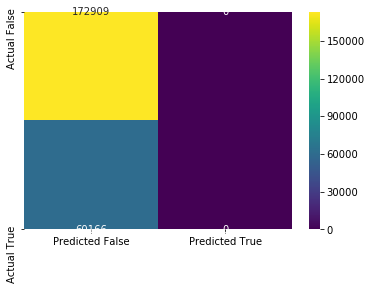

In [31]:
# plt.figure(figsize=(15,15))
# sns.axes_style()
plot_confusion_matrix(y_val, y_pred);

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.74      1.00      0.85    172909
        True       0.00      0.00      0.00     60166

    accuracy                           0.74    233075
   macro avg       0.37      0.50      0.43    233075
weighted avg       0.55      0.74      0.63    233075



/Users/andyjohana/anaconda3/envs/unit2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
confusion_matrix(y_val, y_pred)

array([[172909,      0],
       [ 60166,      0]])

In [34]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train);

CPU times: user 16min 29s, sys: 16.7 s, total: 16min 45s
Wall time: 2min 36s


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Case Number', 'Block', 'IUCR',
                                      'Primary Type', 'Description',
                                      'Location Description', 'District',
                                      'Ward', 'FBI Code', 'Location',
                                      'Weekday'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Case Number',
                                          'data_type': dtype('O'),
                                          'mapping': HY112920         1
HV469604         2
HV131429...
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_featur

In [35]:
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.8917816153598627

In [36]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

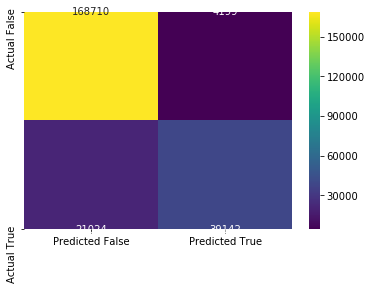

In [37]:
plot_confusion_matrix(y_val, y_pred);

In [38]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93    172909
        True       0.90      0.65      0.76     60166

    accuracy                           0.89    233075
   macro avg       0.90      0.81      0.84    233075
weighted avg       0.89      0.89      0.89    233075



In [39]:
confusion_matrix(y_val, y_pred)

array([[168710,   4199],
       [ 21024,  39142]])

In [40]:
168710+39142

207852

In [41]:
21024+4199

25223

In [42]:
import eli5
from eli5.sklearn import PermutationImportance

In [43]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0925 ± 0.0003,Primary Type
0.0562 ± 0.0000,FBI Code
0.0276 ± 0.0001,IUCR
0.0276 ± 0.0007,Description
0.0073 ± 0.0004,Location Description
0.0038 ± 0.0003,Block
0.0031 ± 0.0001,Location
0.0017 ± 0.0000,Domestic
0.0016 ± 0.0003,Y Coordinate
0.0016 ± 0.0002,Latitude


In [45]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (932296, 21)


In [56]:
minimum_importance = 0.0002
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

print('Shape after removing features:', X_train2.shape)

Shape after removing features: (932296, 16)


In [68]:
X_train.columns

Index(['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Domestic', 'Beat', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Location', 'Month'],
      dtype='object')

In [60]:
X_val = X_val[features]
X_val.shape

(233075, 16)

In [61]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8900611391183095


In [62]:
#XBBOOST 

In [63]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Block', 'IUCR', 'Primary Type',
                                      'Description', 'Location Description',
                                      'FBI Code', 'Location'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Block',
                                          'data_type': dtype('O'),
                                          'mapping': 058XX N WASHTENAW AVE            1
002XX E 115TH ST                 2
012XX W 50TH ST                  3
049XX W ADAMS ST                 4
059XX W WASHIN...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=

In [64]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.8827158639922772


In [65]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((932296, 16), (233075, 16), (932296, 16), (233075, 16))

In [66]:
y_val.shape,y_train.shape

((233075,), (932296,))

In [67]:
eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=7,       # try deeper trees because of high cardinality categoricals
    learning_rate=0.1, # try higher learning rate
    n_jobs=-1
)

model.fit(X_train_encoded, y_train, eval_set=eval_set, 
          eval_metric='merror', early_stopping_rounds=50)

XGBoostError: [18:01:09] /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/metric/multiclass_metric.cu:32: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012f83af89 dmlc::LogMessageFatal::~LogMessageFatal() + 57
  [bt] (1) 2   libxgboost.dylib                    0x000000012f8b1454 xgboost::metric::MultiClassMetricsReduction<xgboost::metric::EvalMatchError>::CheckLabelError(int, unsigned long) const + 228
  [bt] (2) 3   libxgboost.dylib                    0x000000012f8b0a3b xgboost::metric::EvalMClassBase<xgboost::metric::EvalMatchError>::Eval(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, bool) + 1083
  [bt] (3) 4   libxgboost.dylib                    0x000000012f89680d xgboost::LearnerImpl::EvalOneIter(int, std::__1::vector<xgboost::DMatrix*, std::__1::allocator<xgboost::DMatrix*> > const&, std::__1::vector<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::allocator<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > const&) + 2173
  [bt] (4) 5   libxgboost.dylib                    0x000000012f835725 XGBoosterEvalOneIter + 805
  [bt] (5) 6   libffi.6.dylib                      0x000000010c764884 ffi_call_unix64 + 76
  [bt] (6) 7   ???                                 0x00007ffee567bf10 0x0 + 140732747202320

